In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import string
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
complaints = pd.read_csv("./Data/complaints.csv")

In [3]:
complaints

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [4]:
### Convert column name so that they don't have space and are more readable
complaints = complaints.rename(columns = {'Consumer complaint narrative' : 'complaint_narrative', 'Issue' : 'complaint_issue'})

<Axes: >

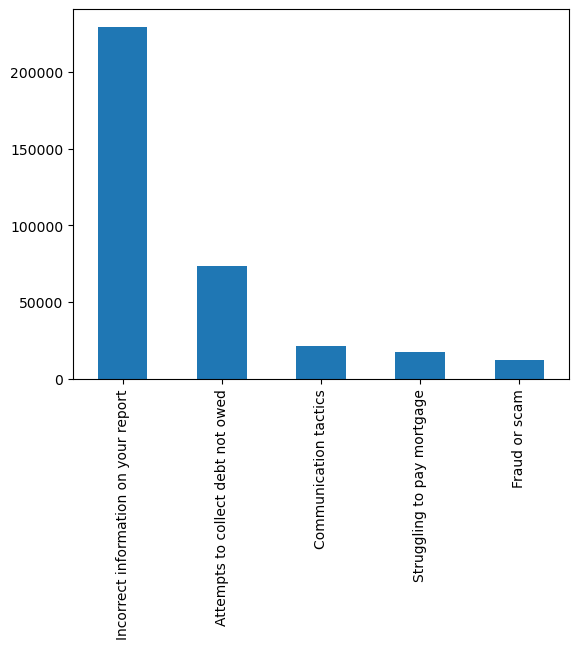

In [5]:
complaints['complaint_issue'].value_counts().plot(kind = 'bar')

In [6]:
# Use mapping to convert columns to numerical values
issue = {'Attempts to collect debt not owed': 1, 
                 'Communication tactics': 2, 
                 'Fraud or scam': 3, 
                 'Incorrect information on your report': 4,
                 'Struggling to pay mortgage': 5}
# replace the issue values with numerical values
complaints['complaint_issue'] = complaints['complaint_issue'].replace(issue)

<Axes: ylabel='Frequency'>

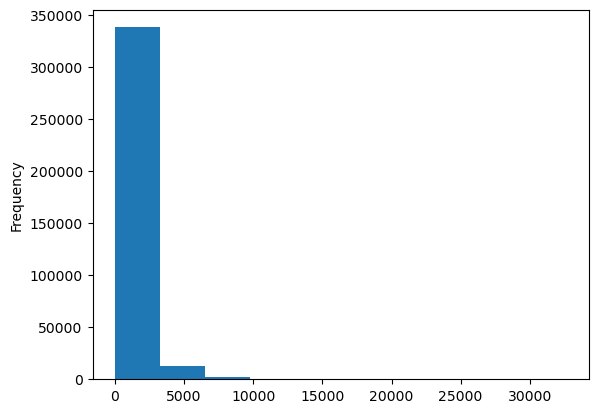

In [7]:
complaints['complaint_narrative'].apply(len).plot(kind = 'hist')

In [8]:
### Keep the length columns as a new column
complaints['complaint_length'] = complaints['complaint_narrative'].apply(len)
complaints['complaint_narrative'] = complaints['complaint_narrative'].str.replace(r'[xX][xX]+',"")

# stripping all numeric values from complaints
complaints['complaint_narrative'] = complaints['complaint_narrative'].str.replace('\d+', '', regex=True)

/var/folders/s3/9_r9v9px7_v0q69b5zcbnmsm0000gn/T/ipykernel_64330/904692369.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  complaints['complaint_narrative'] = complaints['complaint_narrative'].str.replace(r'[xX][xX]+',"")


In [9]:
complaints.loc[0]['complaint_narrative']

'My name is   this complaint is not made in error neither is it being made by a third party. I declare under penalty of perjury I am alleging that a person or company- without my authorization- from unauthorized use of my social security number and card used my personal identifying information to apply for goods, services, or money ; and, was successful in creating some accounts. I have no knowledge of this and all is being investigated by the FTC and Under  U.S. Code b Permissible purposes of consumer reports I never gave any written consent to report anything on my consumer reports.       Date Opened : // Balance : {$.}. Please delete this account ASAP.'

In [10]:
stopwords_list = stopwords.words('english') + list(string.punctuation)

In [11]:
stopwords_list 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/badalpatel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
lemm = WordNetLemmatizer()

def make_lemma(list_of_words):
    
    # lemmatize each word
    lemmatized_list = []
    for idx, word in enumerate(list_of_words):
        lemmatized_list.append(lemm.lemmatize(word))
    return(lemmatized_list)




In [ ]:
' '.join(complaints.loc[0, 'lemmatized_text'])

In [24]:
complaints['lemmatized_text'] = complaints['complaint_narrative'].apply(lambda x: make_lemma(x.split()))

In [25]:
complaints

,complaint_narrative,complaint_issue,complaint_length,lemmatized_text
0,My name is this complaint is not made in err...,4,711,"[My, name, is, this, complaint, is, not, made,..."
1,I searched on for and was pointed to a web...,3,1958,"[I, searched, on, for, and, wa, pointed, to, a..."
2,I have a particular account that is stating th...,4,294,"[I, have, a, particular, account, that, is, st..."
3,I have not supplied proof under the doctrine o...,1,3444,"[I, have, not, supplied, proof, under, the, do..."
4,Hello i'm writing regarding account on my cred...,4,876,"[Hello, i'm, writing, regarding, account, on, ..."
...,...,...,...,...
353427,Collections account I have no knowledge of,1,42,"[Collections, account, I, have, no, knowledge,..."
353428,"Dear CFPB Team, The reason for my complaint is...",1,4586,"[Dear, CFPB, Team,, The, reason, for, my, comp..."
353429,FRCA violations : Failing to Follow Debt Dispu...,1,4328,"[FRCA, violation, :, Failing, to, Follow, Debt..."
353430,"My Father, a acquired an HECM reverse mortg...",5,5418,"[My, Father,, a, acquired, an, HECM, reverse, ..."


In [16]:
X = complaints[['lemmatized_text']]
y = complaints['complaint_issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [17]:
stopwords_list = stopwords.words('english')

vect = CountVectorizer(stop_words = stopwords_list) 

X_train_vec = vect.fit_transform(X_train['lemmatized_text'])
X_test_vec = vect.transform(X_test['lemmatized_text'])

In [18]:
vect.vocabulary_

{'filed': 22202,
 'identity': 27500,
 'theft': 55708,
 'report': 46970,
 'learned': 32340,
 'someone': 52017,
 'wa': 61201,
 'using': 59966,
 'incarceration': 28471,
 'submitted': 53715,
 'documentation': 17679,
 'transunion': 57440,
 'disregarded': 17287,
 'even': 20413,
 'block': 7210,
 'account': 677,
 'day': 14539,
 'upon': 59758,
 'receiving': 45241,
 'information': 29167,
 'also': 2676,
 'received': 45213,
 'letter': 32616,
 'irs': 30749,
 'stating': 52958,
 'tax': 54963,
 'return': 48099,
 'name': 36665,
 'us': 59849,
 'dept': 15751,
 'educatio': 18691,
 'acct': 809,
 'closed': 10512,
 'send': 50193,
 'written': 62719,
 'notification': 37896,
 'reported': 46983,
 'consumer': 12380,
 'reporting': 47010,
 'agency': 2002,
 'never': 37264,
 'ever': 20441,
 'late': 32112,
 'although': 2724,
 'updated': 59696,
 'chargeoff': 9684,
 'providing': 43908,
 'severe': 50570,
 'scandalous': 49525,
 'action': 1111,
 'destroying': 16049,
 'perfect': 41134,
 'payment': 40756,
 'history': 26505,


In [ ]:
def tokenize_and_remove_stopwords(dataframe, column_name):
    stopwords_list = stopwords.words('english') + list(string.punctuation) 

    tokenized_data = []
    for row in dataframe[column_name]:
        tokens = nltk.word_tokenize(row.lower())
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
        tokenized_data.append(filtered_tokens)

    return tokenized_data

complaints['issues_tokenized'] = tokenize_and_remove_stopwords(complaints, 'complaint_narrative')

In [ ]:
row = " My brain is not functioning right-now"
tokens = nltk.word_tokenize(row.lower())
filtered_tokens = [token for token in tokens if token not in stopwords_list]
        

In [ ]:
filtered_tokens

In [ ]:
complaints

In [ ]:
complaints.loc[0]['complaint_narrative']

In [ ]:
complaints.loc[1]['issues_tokenized']

In [ ]:
tokenize_and_remove_stopwords("complaint_narrative")

In [ ]:
# list of potentially unique redaction patterns.  
redaction_patterns = complaints['complaint_narrative'].str.extractall(r'(X+)').reset_index()[0].unique()

# display the results
print(redaction_patterns)

In [ ]:
redaction_counts = complaints.groupby('complaint_issue')['complaint_narrative'].apply(lambda x: x.str.extractall(r'(\w+X+\w+)').groupby(0).size().reset_index(name='count'))
redaction_counts

In [ ]:
complaints['complaint_length'].max()

In [ ]:
complaints['complaint_length'].min()

In [ ]:
X = complaints[['complaint_narrative']]
y = complaints['complaint_issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [ ]:
#fit and transform a CountVectorizer (using all defaults) on the complaint_narrative column of X_train and X_test
vect = CountVectorizer() 

X_train_vec = vect.fit_transform(X_train['complaint_narrative'])
X_test_vec = vect.transform(X_test['complaint_narrative'])

In [ ]:
vect.vocabulary_

In [ ]:
sum(vect.vocabulary_.values()) 

In [ ]:
len(vect.vocabulary_)

In [ ]:
word_counts = pd.DataFrame({
    'words': vect.vocabulary_.keys(), 
    'frequency': vect.vocabulary_.values()
})

word_counts.head()

In [ ]:
word_counts = pd.DataFrame({
'words': vect.get_feature_names_out(),
'frequency': np.array(X_train_vec.sum(axis = 0)).flatten()
})

word_counts.sort_values('frequency', ascending=False).head()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB().fit(X_train_vec, y_train)

y_pred = nb.predict(X_test_vec)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)